In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from pandas.api.types import CategoricalDtype
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [24]:
# Customer churn is the percentage of customers that stopped using your company's product or service during a certain time frame
df = pd.read_csv("customerchurn.csv")
# Delete unnecessary columns
df.drop("customerID", axis="columns",inplace=True)

# The column Totalcharges is object type but it should be numeric, and it has some NA.
idx = df.index[df.TotalCharges==' ']
df = df.drop(idx)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

# Look at the Data Frame
print(df.shape)
print(df.dtypes)

(7032, 20)
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object


In [25]:
# tenure: Number of months the customer has stayed with the company
# Churn: Whether the customer churned or not (Yes or No). If Yes, then the cliente is leaving
# We can see the fact that the client is leaving as a function of the amount of months that he's in the company
print(df[df.Churn=="No"].tenure)
print(df[df.Churn=="Yes"].tenure)

0        1
1       34
3       45
6       22
7       10
        ..
7037    72
7038    24
7039    72
7040    11
7042    66
Name: tenure, Length: 5163, dtype: int64
2        2
4        2
5        8
8       28
13      49
        ..
7021    12
7026     9
7032     1
7034    67
7041     4
Name: tenure, Length: 1869, dtype: int64


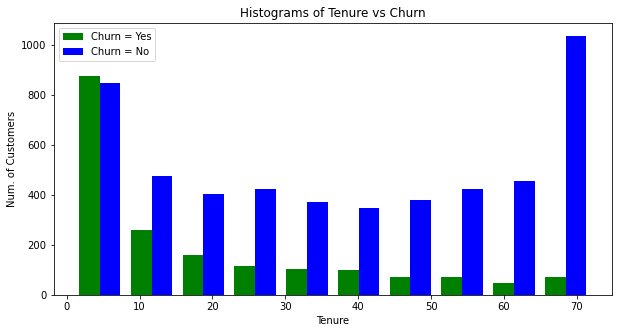

In [26]:
# Histograms of Tenure and Churn
ten_churn_no = df[df.Churn=="No"].tenure
ten_churn_yes = df[df.Churn=="Yes"].tenure
plt.figure(figsize=(10,5))
plt.xlabel("Tenure")
plt.ylabel("Num. of Customers")
plt.title("Histograms of Tenure vs Churn")
plt.hist([ten_churn_yes, ten_churn_no], color = ['green','blue'], label=["Churn = Yes", "Churn = No"])
plt.legend()
# It seems that those clients that are in the company for too long are more frequent to remain in the company
# The majority of the clients that are leaving are those with a small amount of time within the company

In [27]:
# Define a structure function
def structure(df):
    for column in df:
        print(f'{column} : {df[column].unique()}')

structure(df)

gender : ['Female' 'Male']
SeniorCitizen : [0 1]
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
tenure : [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges : [29.85 56.95 53.85 ... 63.1  44.2  78

In [28]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [29]:
# Let's see how balance the data is
print(df.Churn.unique())
print(df.Churn.value_counts())

['No' 'Yes']
No     5163
Yes    1869
Name: Churn, dtype: int64


In [30]:
# Transform the ['Yes', 'No'] columns into [1,0]
yes_no_col = ['Partner', 'Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection',
'TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_col:
    df[col].replace({'Yes':1, 'No':0}, inplace=True)

In [31]:
# Gender variables
df['gender'].replace({'Female':1, 'Male':0}, inplace=True)
# Add dummies for multicategoric
df = pd.get_dummies(data=df, columns=['InternetService','Contract', 'PaymentMethod'])
df.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [32]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [33]:
X = df.drop('Churn', axis = 'columns')
y = df['Churn']
print(y.value_counts())

0    5163
1    1869
Name: Churn, dtype: int64


In [34]:
# SMOTE to deal with unbalanced data
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X,y)
print(y_sm.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.2, random_state=15, stratify=y_sm)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

0    5163
1    5163
Name: Churn, dtype: int64
(8260, 26)
(2066, 26)
(8260,)
(2066,)


In [35]:
model = keras.Sequential([
    keras.layers.Dense(500, input_shape=(26,), activation='relu'),
    keras.layers.Dense(200, activation='relu'),
    keras.layers.Dense(150, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid'),
])
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = 'BinaryAccuracy')
model.fit(X_train, y_train, epochs = 100)
model.evaluate(X_test, y_test)

Epoch 1/100
259/259 [==============================] - 2s 5ms/step - loss: 0.4825 - binary_accuracy: 0.7753
Epoch 2/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4493 - binary_accuracy: 0.7883
Epoch 3/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4343 - binary_accuracy: 0.8021
Epoch 4/100
259/259 [==============================] - 1s 6ms/step - loss: 0.4190 - binary_accuracy: 0.8098
Epoch 5/100
259/259 [==============================] - 1s 5ms/step - loss: 0.4014 - binary_accuracy: 0.8211
Epoch 6/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3904 - binary_accuracy: 0.8283
Epoch 7/100
259/259 [==============================] - 1s 6ms/step - loss: 0.3784 - binary_accuracy: 0.8335
Epoch 8/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3658 - binary_accuracy: 0.8408
Epoch 9/100
259/259 [==============================] - 1s 5ms/step - loss: 0.3501 - binary_accuracy: 0.8450
Epoch 10/100
259/259 [======

[1.3277848958969116, 0.8025169372558594]

In [36]:
yp = model.predict(X_test)
y_pred = []
for i in yp:
    if i > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [37]:
from sklearn.metrics import confusion_matrix, classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.77      0.80      1033
           1       0.78      0.84      0.81      1033

    accuracy                           0.80      2066
   macro avg       0.80      0.80      0.80      2066
weighted avg       0.80      0.80      0.80      2066



Text(69.0, 0.5, 'Truth')

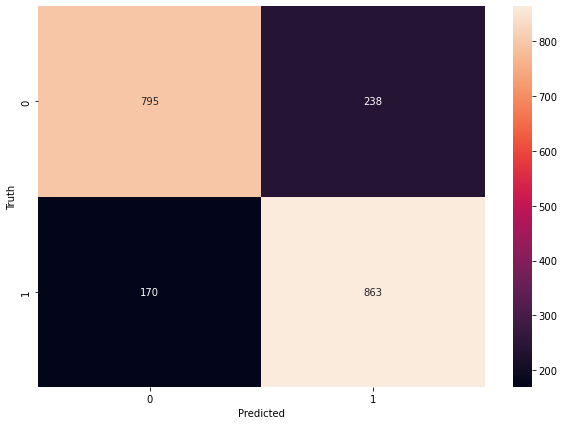

In [38]:
# Create a confusion matrix to assess the predictions
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)
plt.figure(figsize=(10,7))
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')